In [1]:
import numpy as np
import matplotlib.pyplot as plt
import splat

import scipy.stats as st
from scipy import integrate 

import matplotlib as mpl
from tqdm import tqdm

#matplotlib defaults
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.1
mpl.rcParams['figure.figsize'] = [6.0, 3.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'large'
%matplotlib inline

/Users/caganze/research/splat/splat/core.py:44: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('agg')
/Users/caganze/research/splat/splat/utilities.py:23: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('agg')


In [2]:
#parameters of my model
p=-3.5
r0=1.0
r1=3.0
r3=2.0
mind=r0/(1000)
maxd=1000*r0

In [3]:
from scipy import integrate 

def rho(d ):
    return np.exp(-d/r0)*((d/r1)**p)

dspan=np.logspace(np.log10(mind), np.log10(maxd), 100)
norm=np.trapz(rho(dspan)* dspan**2, x=dspan)

class my_pdf(st.rv_continuous):
    def _cdf(self,xr):
            dspan=np.logspace(-3, np.log10(xr), 100)
            val=np.trapz(rho(dspan)* dspan**2, x=dspan)/norm
            return val

In [4]:
my_cv = my_pdf(a=mind, b=maxd, name='my_pdf')

In [5]:
u=np.random.uniform(-1,1, 100000)
theta=np.random.uniform(-np.pi, np.pi, 100000)
ds=my_cv.rvs(size=100000)
xrnge=np.logspace(-1,1.3, 1000)

In [6]:
cdfs=[my_cv.cdf(x=i) for i in xrnge]
pdfs=[my_cv.pdf(x=i) for i in xrnge]

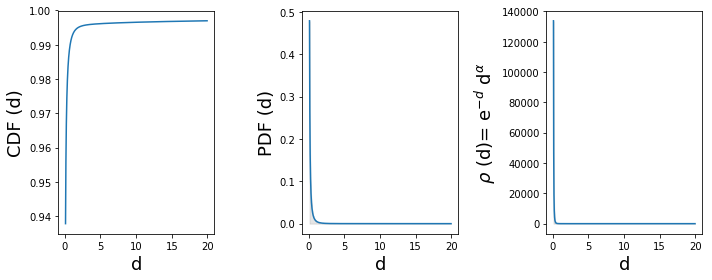

In [7]:

fig, ax=plt.subplots(ncols=3, figsize=(10,4))
ax[0].plot(xrnge,cdfs )
#ax[0].fill_between( xrnge, cdfs, color='gray',step="mid", alpha=0.2)
ax[1].plot(xrnge,pdfs )
ax[1].fill_between( xrnge, pdfs, color='gray',step="mid", alpha=0.2)
ax[2].plot(xrnge, rho(xrnge))
ax[2].fill_between( xrnge, rho(xrnge), color='gray',step="mid", alpha=0.2)

ax[0].set_xlabel('d', fontsize=18)
ax[0].set_ylabel('CDF (d)', fontsize=18)

ax[1].set_xlabel('d', fontsize=18)
ax[1].set_ylabel('PDF (d)', fontsize=18)

ax[2].set_xlabel('d', fontsize=18)
ax[2].set_ylabel(r'$\rho$ (d)= e$^{-d}$ d$^\alpha$', fontsize=18)
plt.tight_layout()

In [8]:
x=ds*((1-u**2)**0.5)*np.cos(theta)
y=ds*((1-u**2)**0.5)*np.sin(theta)
z=ds*u

In [9]:
xsur=x/ds
ysur=y/ds
zsur=z/ds

(-0.05, 0.05)

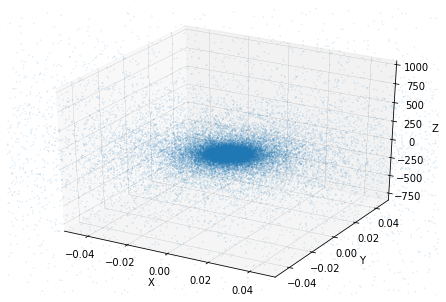

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig) #<-- Note the difference from your original code...

ax.scatter(x, y, z, marker='+', alpha=0.1, s=1.0)
#ax.plot(xsur, ysur, zsur, '+')
#ax.plot(x, y, z, '+')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


ax.set_xlim([-0.05,0.05])
ax.set_ylim([-0.05,0.05])

#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

In [11]:
r=(x**2+y**2)**(0.5)

(-0.05, 0.05)

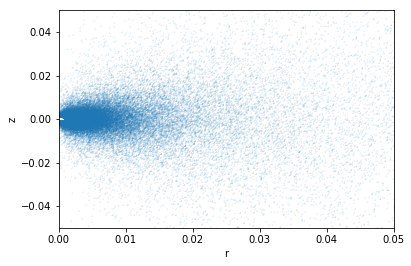

In [12]:
plt.scatter(r, z, marker='+', s=1.0, alpha=0.1)
rsur=(xsur**2.+ysur**2.)**(0.5)
#plt.scatter(rsur, zsur, marker='+', s=1.0)
plt.xlabel('r')
plt.ylabel('z')
plt.xlim(0,0.05)
plt.ylim(-0.05,0.05)

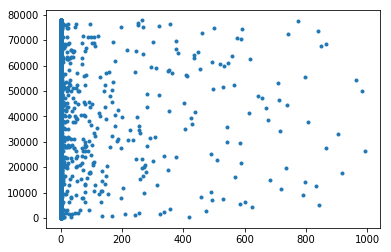

In [13]:
ds=((r**2+z**2)**0.5)
plt.plot(ds, np.cumsum(ds), '.')